KELOMPOK 5



*   Arifin Zulfan Afandya/442023611043
*   Dziffar J./442023611055
*   Hikam Ibnu Khalid/442023611044
*   M. Rizqi Anugrah/442023611041
*   Rahmat Abdurrahman/442023611047



**IMPORT**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import struct
from PIL import Image

In [ ]:
class MNISTDataset(Dataset):
    def __init__(self, images_path, labels_path, image_size=28):
        self.images_path = images_path
        self.labels_path = labels_path
        self.image_size = image_size

        self.images = self._read_images(self.images_path)
        self.labels = self._read_labels(self.labels_path)

        self.transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomAffine(0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])


    def _read_images(self, filepath):
        with open(filepath, 'rb') as f:
            magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
            images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28, 28)
        return images

    def _read_labels(self, filepath):
        with open(filepath, 'rb') as f:
            magic, num = struct.unpack(">II", f.read(8))
            labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        image = Image.fromarray(image, mode='L')

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
class MnistClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MnistClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # Pilih file kaggle.json dari komputermu

# Pindahkan ke direktori yang benar dan atur permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [ ]:
# Ganti URL ini dengan URL dataset pilihanmu dari Kaggle
!kaggle datasets download -d hojjatk/mnist-dataset

# Ekstrak file ZIP
!unzip mnist-dataset.zip -d mnist_dataset

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
mnist-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mnist-dataset.zip
replace mnist_dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
replace mnist_dataset/t10k-images.idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_dataset/t10k-images.idx3-ubyte  
replace mnist_dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
replace mnist_dataset/t10k-labels.idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_dataset/t10k-labels.idx1-ubyte  
replace mnist_dataset/train-images-idx3-ubyte/train-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_

In [ ]:
!ls /content/mnist_dataset/

t10k-images-idx3-ubyte	t10k-labels.idx1-ubyte	 train-labels-idx1-ubyte
t10k-images.idx3-ubyte	train-images-idx3-ubyte  train-labels.idx1-ubyte
t10k-labels-idx1-ubyte	train-images.idx3-ubyte


In [ ]:
import argparse
from torch.utils.data import DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

train_dataset = MNISTDataset(
    images_path='/content/mnist_dataset/train-images.idx3-ubyte',
    labels_path='/content/mnist_dataset/train-labels.idx1-ubyte'
)



test_dataset = MNISTDataset(
    images_path='/content/mnist_dataset/t10k-images.idx3-ubyte',
    labels_path='/content/mnist_dataset/t10k-labels.idx1-ubyte'
)


batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 10

model = MnistClassifier(num_classes)
model = model.to(device)

In [ ]:
# ini adalah fungsi loss
criterion = nn.CrossEntropyLoss()

# algoritma optimasi
# gradient descent
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

Total parameters: 60874
Trainable parameters: 60874


In [ ]:
train_losses = []
test_losses = []

epochs = 10
output_path = '/content/model.pth'

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for data, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)

    model.eval()
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * data.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    avg_train_loss = train_loss / len(train_dataset)
    avg_test_loss = test_loss / len(test_dataset)

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch+1}: Train Loss {avg_train_loss:.4f}, Test Loss {avg_test_loss:.4f}, Test Acc {acc:.4f}")

torch.save({
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': train_losses,
    'test_loss': test_losses,
}, output_path)

Epoch 1: 100%|██████████| 3750/3750 [06:10<00:00, 10.12it/s]


Epoch 1: Train Loss 0.4433, Test Loss 0.1259, Test Acc 0.9628


Epoch 2: 100%|██████████| 3750/3750 [06:09<00:00, 10.14it/s]


Epoch 2: Train Loss 0.1660, Test Loss 0.0863, Test Acc 0.9738


Epoch 3: 100%|██████████| 3750/3750 [06:11<00:00, 10.10it/s]


Epoch 3: Train Loss 0.1280, Test Loss 0.0713, Test Acc 0.9781


Epoch 4: 100%|██████████| 3750/3750 [06:14<00:00, 10.00it/s]


Epoch 4: Train Loss 0.1093, Test Loss 0.0592, Test Acc 0.9811


Epoch 5: 100%|██████████| 3750/3750 [06:19<00:00,  9.87it/s]


Epoch 5: Train Loss 0.0990, Test Loss 0.0586, Test Acc 0.9814


Epoch 6: 100%|██████████| 3750/3750 [06:31<00:00,  9.58it/s]


Epoch 6: Train Loss 0.0887, Test Loss 0.0498, Test Acc 0.9831


Epoch 7: 100%|██████████| 3750/3750 [06:38<00:00,  9.41it/s]


Epoch 7: Train Loss 0.0812, Test Loss 0.0449, Test Acc 0.9859


Epoch 8: 100%|██████████| 3750/3750 [06:38<00:00,  9.41it/s]


Epoch 8: Train Loss 0.0771, Test Loss 0.0397, Test Acc 0.9881


Epoch 9: 100%|██████████| 3750/3750 [06:36<00:00,  9.45it/s]


Epoch 9: Train Loss 0.0746, Test Loss 0.0402, Test Acc 0.9881


Epoch 10: 100%|██████████| 3750/3750 [06:38<00:00,  9.42it/s]


Epoch 10: Train Loss 0.0693, Test Loss 0.0378, Test Acc 0.9882


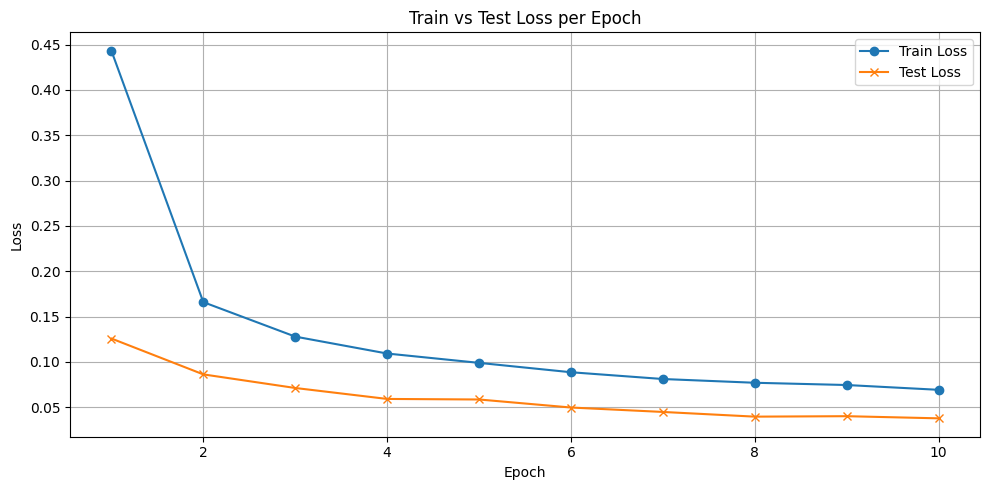

In [ ]:
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, test_losses, label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

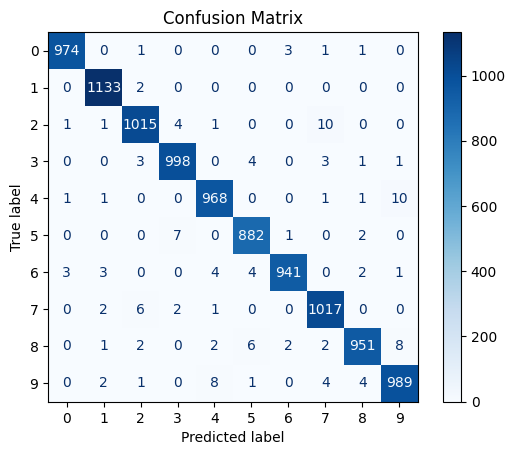

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


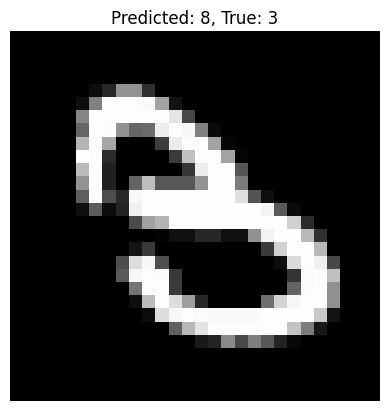

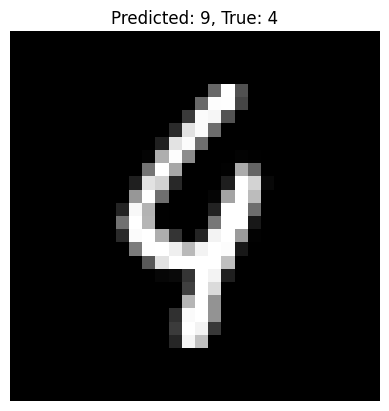

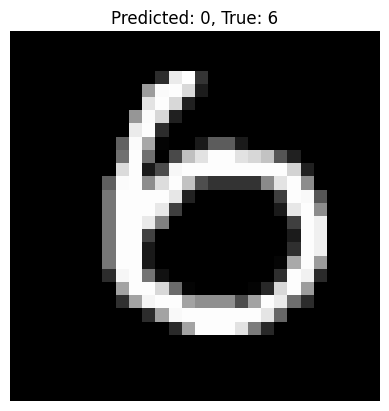

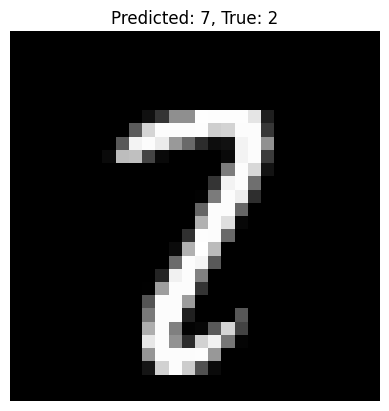

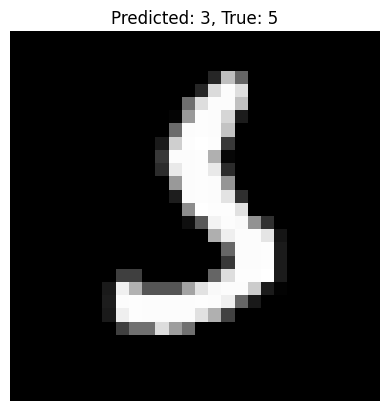

In [ ]:
misclassified = []
model.eval()
with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        for i in range(len(preds)):
            if preds[i] != labels[i] and len(misclassified) < 5:
                misclassified.append((data[i].cpu(), preds[i].cpu(), labels[i].cpu()))

for img, pred, true in misclassified:
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred}, True: {true}")
    plt.axis('off')
    plt.show()
